Autor: Ronaldo David Cornejo Valencia

Tema: Preprocesamiento de la data y EDA

## Importar librerías

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from scipy.stats import boxcox
from scipy.stats.mstats import normaltest

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline

## Leer y Entender la data

In [14]:
data = pd.read_csv('../data/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Verificación de Datos faltantes

In [16]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Verificar si hay duplicados

In [17]:
sum(data.duplicated(subset = 'car_ID')) == 0

True

A continuación, analicemos algunas de nuestras variables de objeto. Usando la función `unique()`, describiremos todas las categorías del atributo 'CarName'.

In [18]:
data["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

Visualizamos que "Car Name" contiene tanto la marca, como el modelo de coche. Por ello lo separamos

In [19]:
data['brand'] = data["CarName"].str.split(" ", n = 1, expand = True)[0].str.lower()

In [20]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Hay algunos errores tipográficos en los nombres de los coches, por lo que deberían corregirse.

In [21]:
data['brand'] = data['brand'].replace(['vw', 'vokswagen'], 'volkswagen')
data['brand'] = data['brand'].replace(['maxda'], 'mazda')
data['brand'] = data['brand'].replace(['porcshce'], 'porsche')
data['brand'] = data['brand'].replace(['toyouta'], 'toyota')

In [22]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Grafiquemos y ordenemos el número total de marcas.

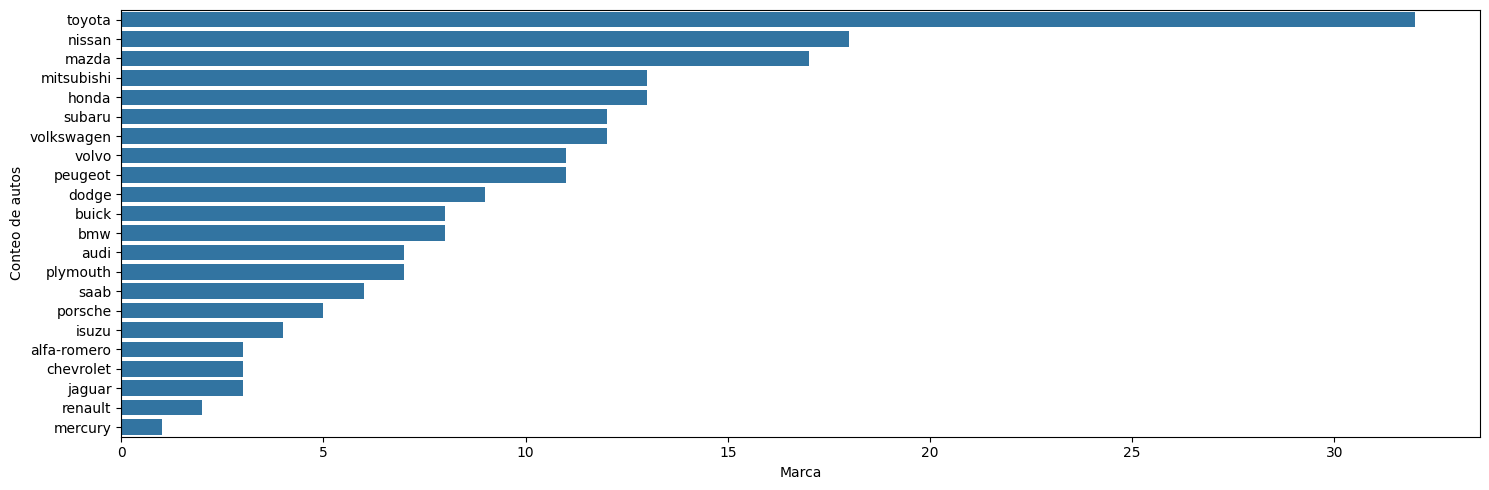

In [23]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(data['brand'], order= data['brand'].value_counts().index)
plt1.set(xlabel = 'Marca', ylabel= 'Conteo de autos')
plt.tight_layout()
plt.show()

Podemos eliminar 'car_ID', 'symboling' y 'CarName' de nuestro marco de datos, ya que ya no serán necesarios.

In [24]:
data.drop(['car_ID', 'symboling', 'CarName'],axis = 1, inplace = True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

Visualizamos todas las variables object y sus cantidades

In [27]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(col, ":", data[col].unique())


fueltype : ['gas' 'diesel']
aspiration : ['std' 'turbo']
doornumber : ['two' 'four']
carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel : ['rwd' 'fwd' '4wd']
enginelocation : ['front' 'rear']
enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
brand : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [28]:
from IPython.display import display

for col in data.columns:
    if data[col].dtype == 'object':
        display(data[col].value_counts())

fueltype
gas       185
diesel     20
Name: count, dtype: int64

aspiration
std      168
turbo     37
Name: count, dtype: int64

doornumber
four    115
two      90
Name: count, dtype: int64

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

enginelocation
front    202
rear       3
Name: count, dtype: int64

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

brand
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: count, dtype: int64

A continuación, Agruparemos nuestros datos por marca 'brand', calcularemos el precio promedio de cada marca y los dividiremos en tres categorías: coches económicos 'Budget', de gama media 'Mid-Range' y de lujo 'Luxury'. Asignaremos a la columna recién creada el nombre de categoria de marca 'brand_category'.

In [29]:
data[["brand","price"]].groupby("brand", as_index= False).mean().rename(columns = {'price': 'brand_avg_price'})

,brand,brand_avg_price
0,alfa-romero,15498.333333
1,audi,17859.166714
2,bmw,26118.750000
3,buick,33647.000000
4,chevrolet,6007.000000
5,dodge,7875.444444
6,honda,8184.692308
7,isuzu,8916.500000
8,jaguar,34600.000000
9,mazda,10652.882353


In [30]:
data_comp_avg_price = data[['brand','price']].groupby('brand', as_index = False).mean().rename(columns={'price':'brand_avg_price'})

Lo unimos al dataset usando "brand"

In [34]:
data = data.merge(data_comp_avg_price, on = 'brand')

In [35]:
data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,brand_avg_price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,15498.333333
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,15498.333333
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,15498.333333
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,17859.166714
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,17859.166714


Con esto podemos ver el rango aproximado para delimitar

In [36]:
data.brand_avg_price.describe()

count      205.000000
mean     13276.710571
std       7154.179185
min       6007.000000
25%       9239.769231
50%      10077.500000
75%      15489.090909
max      34600.000000
Name: brand_avg_price, dtype: float64

In [37]:
data['brand_category'] = data['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                       else ("Mid_Range" if 10000 <= x < 20000 else "Luxury"))

In [41]:
categoricos = data.select_dtypes(include = ['object']).columns.to_list()
categoricos

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'brand',
 'brand_category']

## **Exploratory Data Analysis - Análisis exploratorio de datos**

Lista de variables categóricas:
- brand_category - categoría de marca
- fueltype - tipo de combustible
- enginetype - tipo de motor
- carbody - carrocería
- doornumber - número de puerta
- enginelocation - ubicación del motor
- fuelsystem - sistema de combustible
- cylindernumber - número de cilindro
- aspiration - aspiración
- drivewheel - rueda motriz

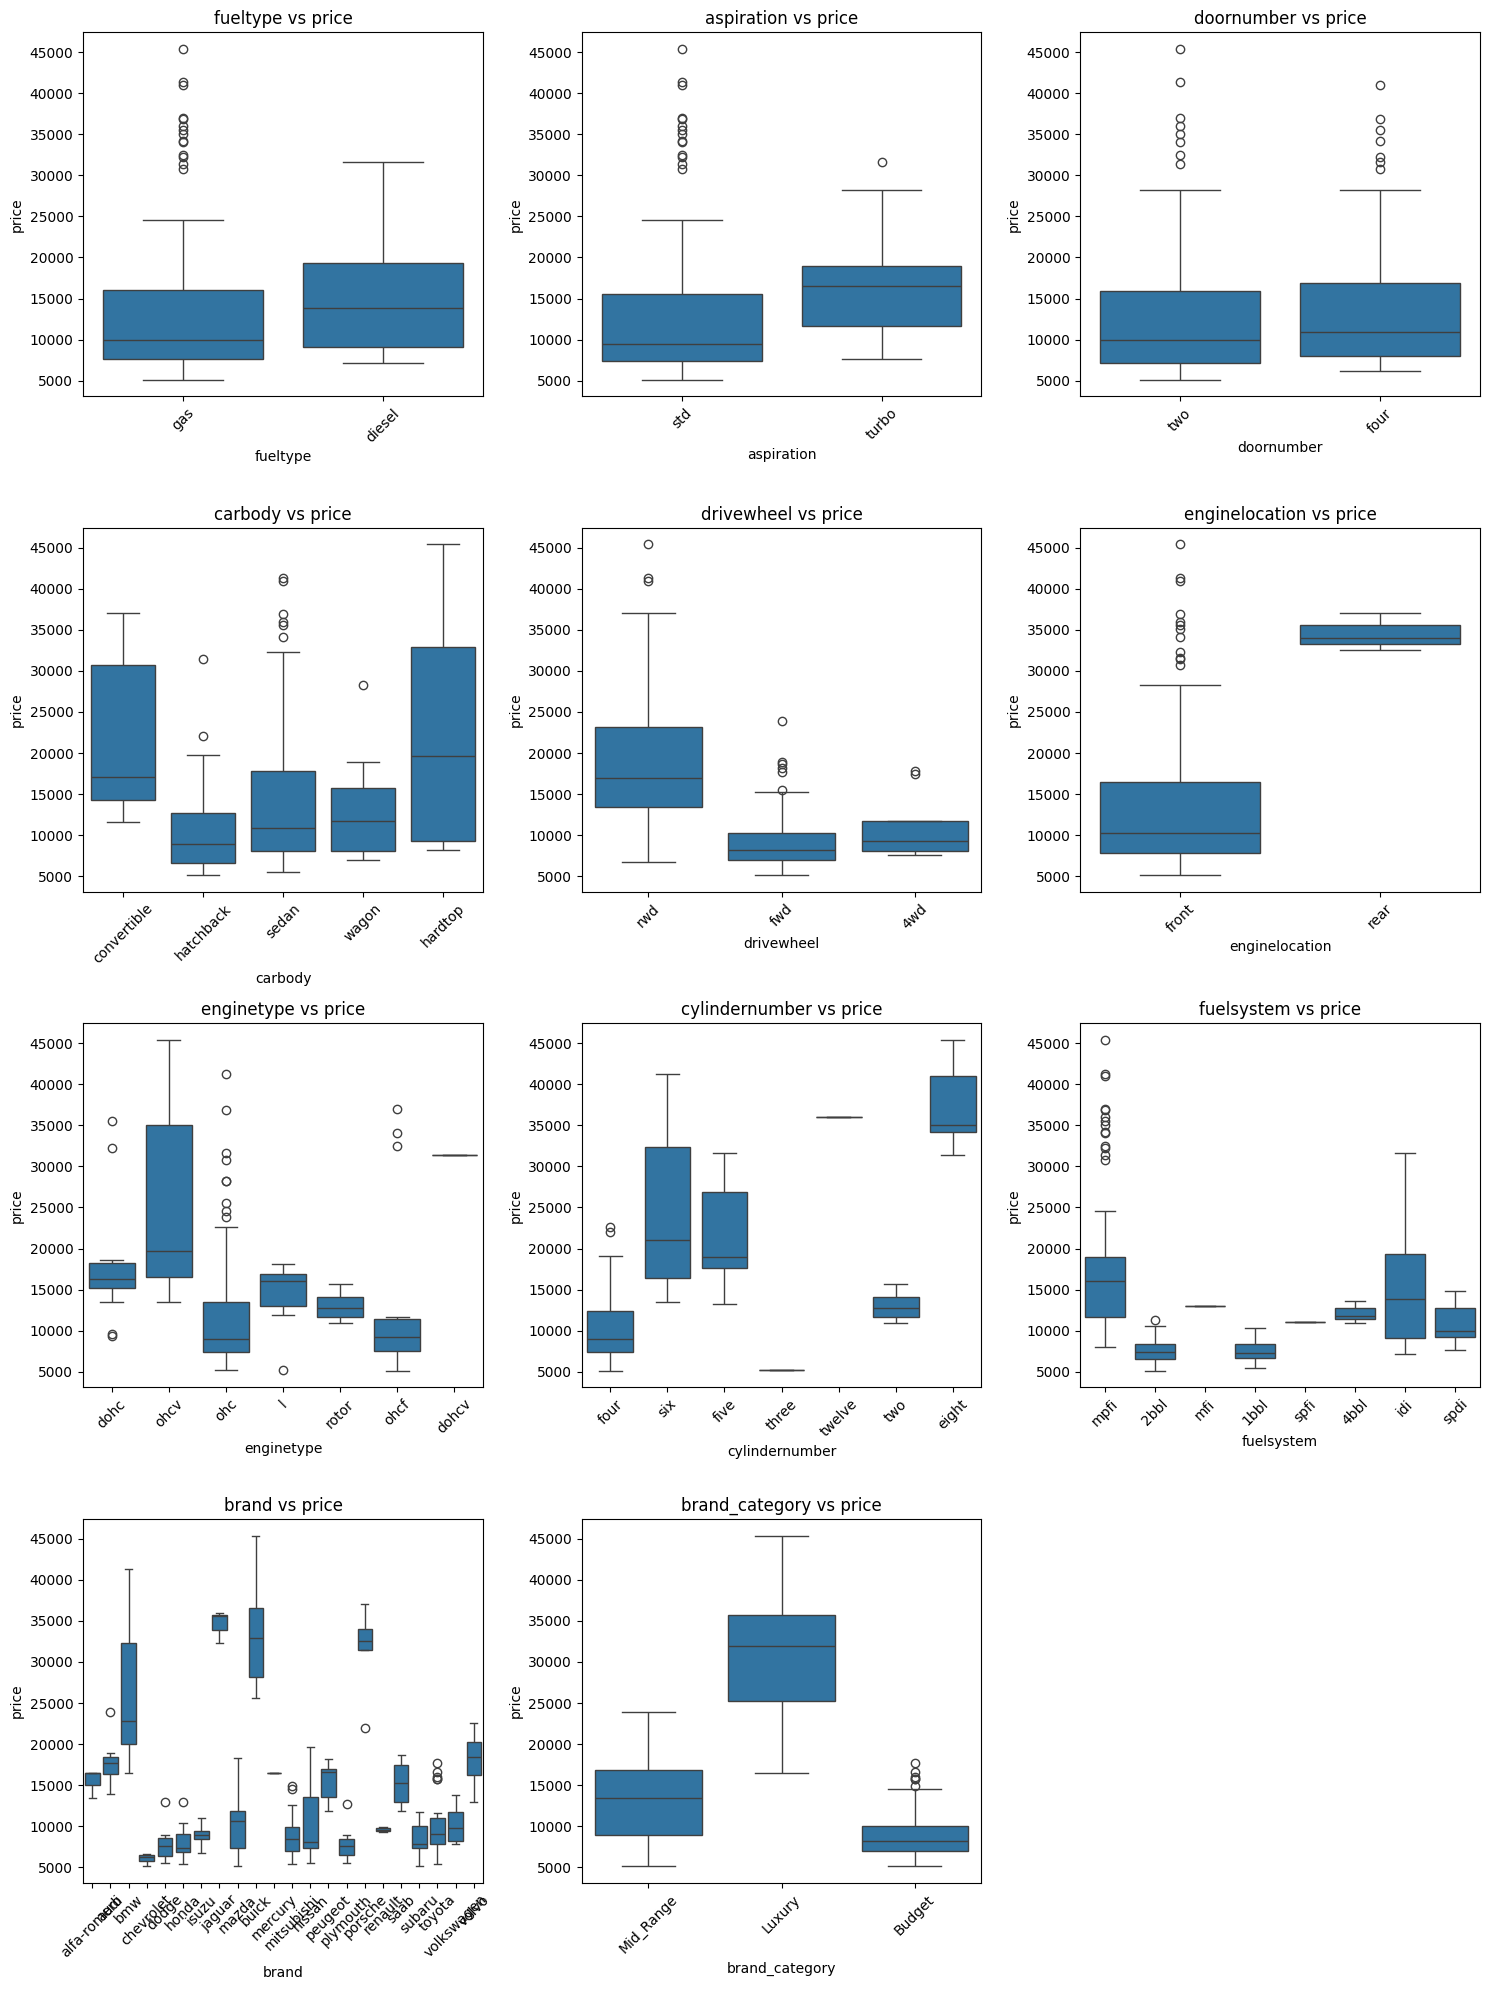

In [42]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(categoricos):
    plt.subplot(4, 3, i + 1)  # 4 filas x 3 columnas
    sns.boxplot(x=col, y='price', data=data)
    plt.title(f'{col} vs price')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Según este pequeño EDA, seleccionamos las siguientes categoricos: 

Categoricos descartados:

- Fuel type: No tiene un alto balanceo( gas -> 185 / diesel ->20) y no hay una diferenciacion en el grafico
- Doornumber: No hay diferenciacion en el grafico
- Enginelocation: Descartado, no hay balanceo (220/3)
- Brand: Descarto por la cantidad de tipos y porque ya lo usé para crear brand_category


Categoricos aceptados:
- Aspiration
- Car Body
- Drivewheel 
- Engine Type 
- Cylinder Number
- fuelsystem
- Brand Category


### Numericos

Visualizamos la correlación

In [43]:
corr_matrix = data.corr(numeric_only=True)

corr_matrix['price'].sort_values(ascending=False)

price               1.000000
brand_avg_price     0.895520
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

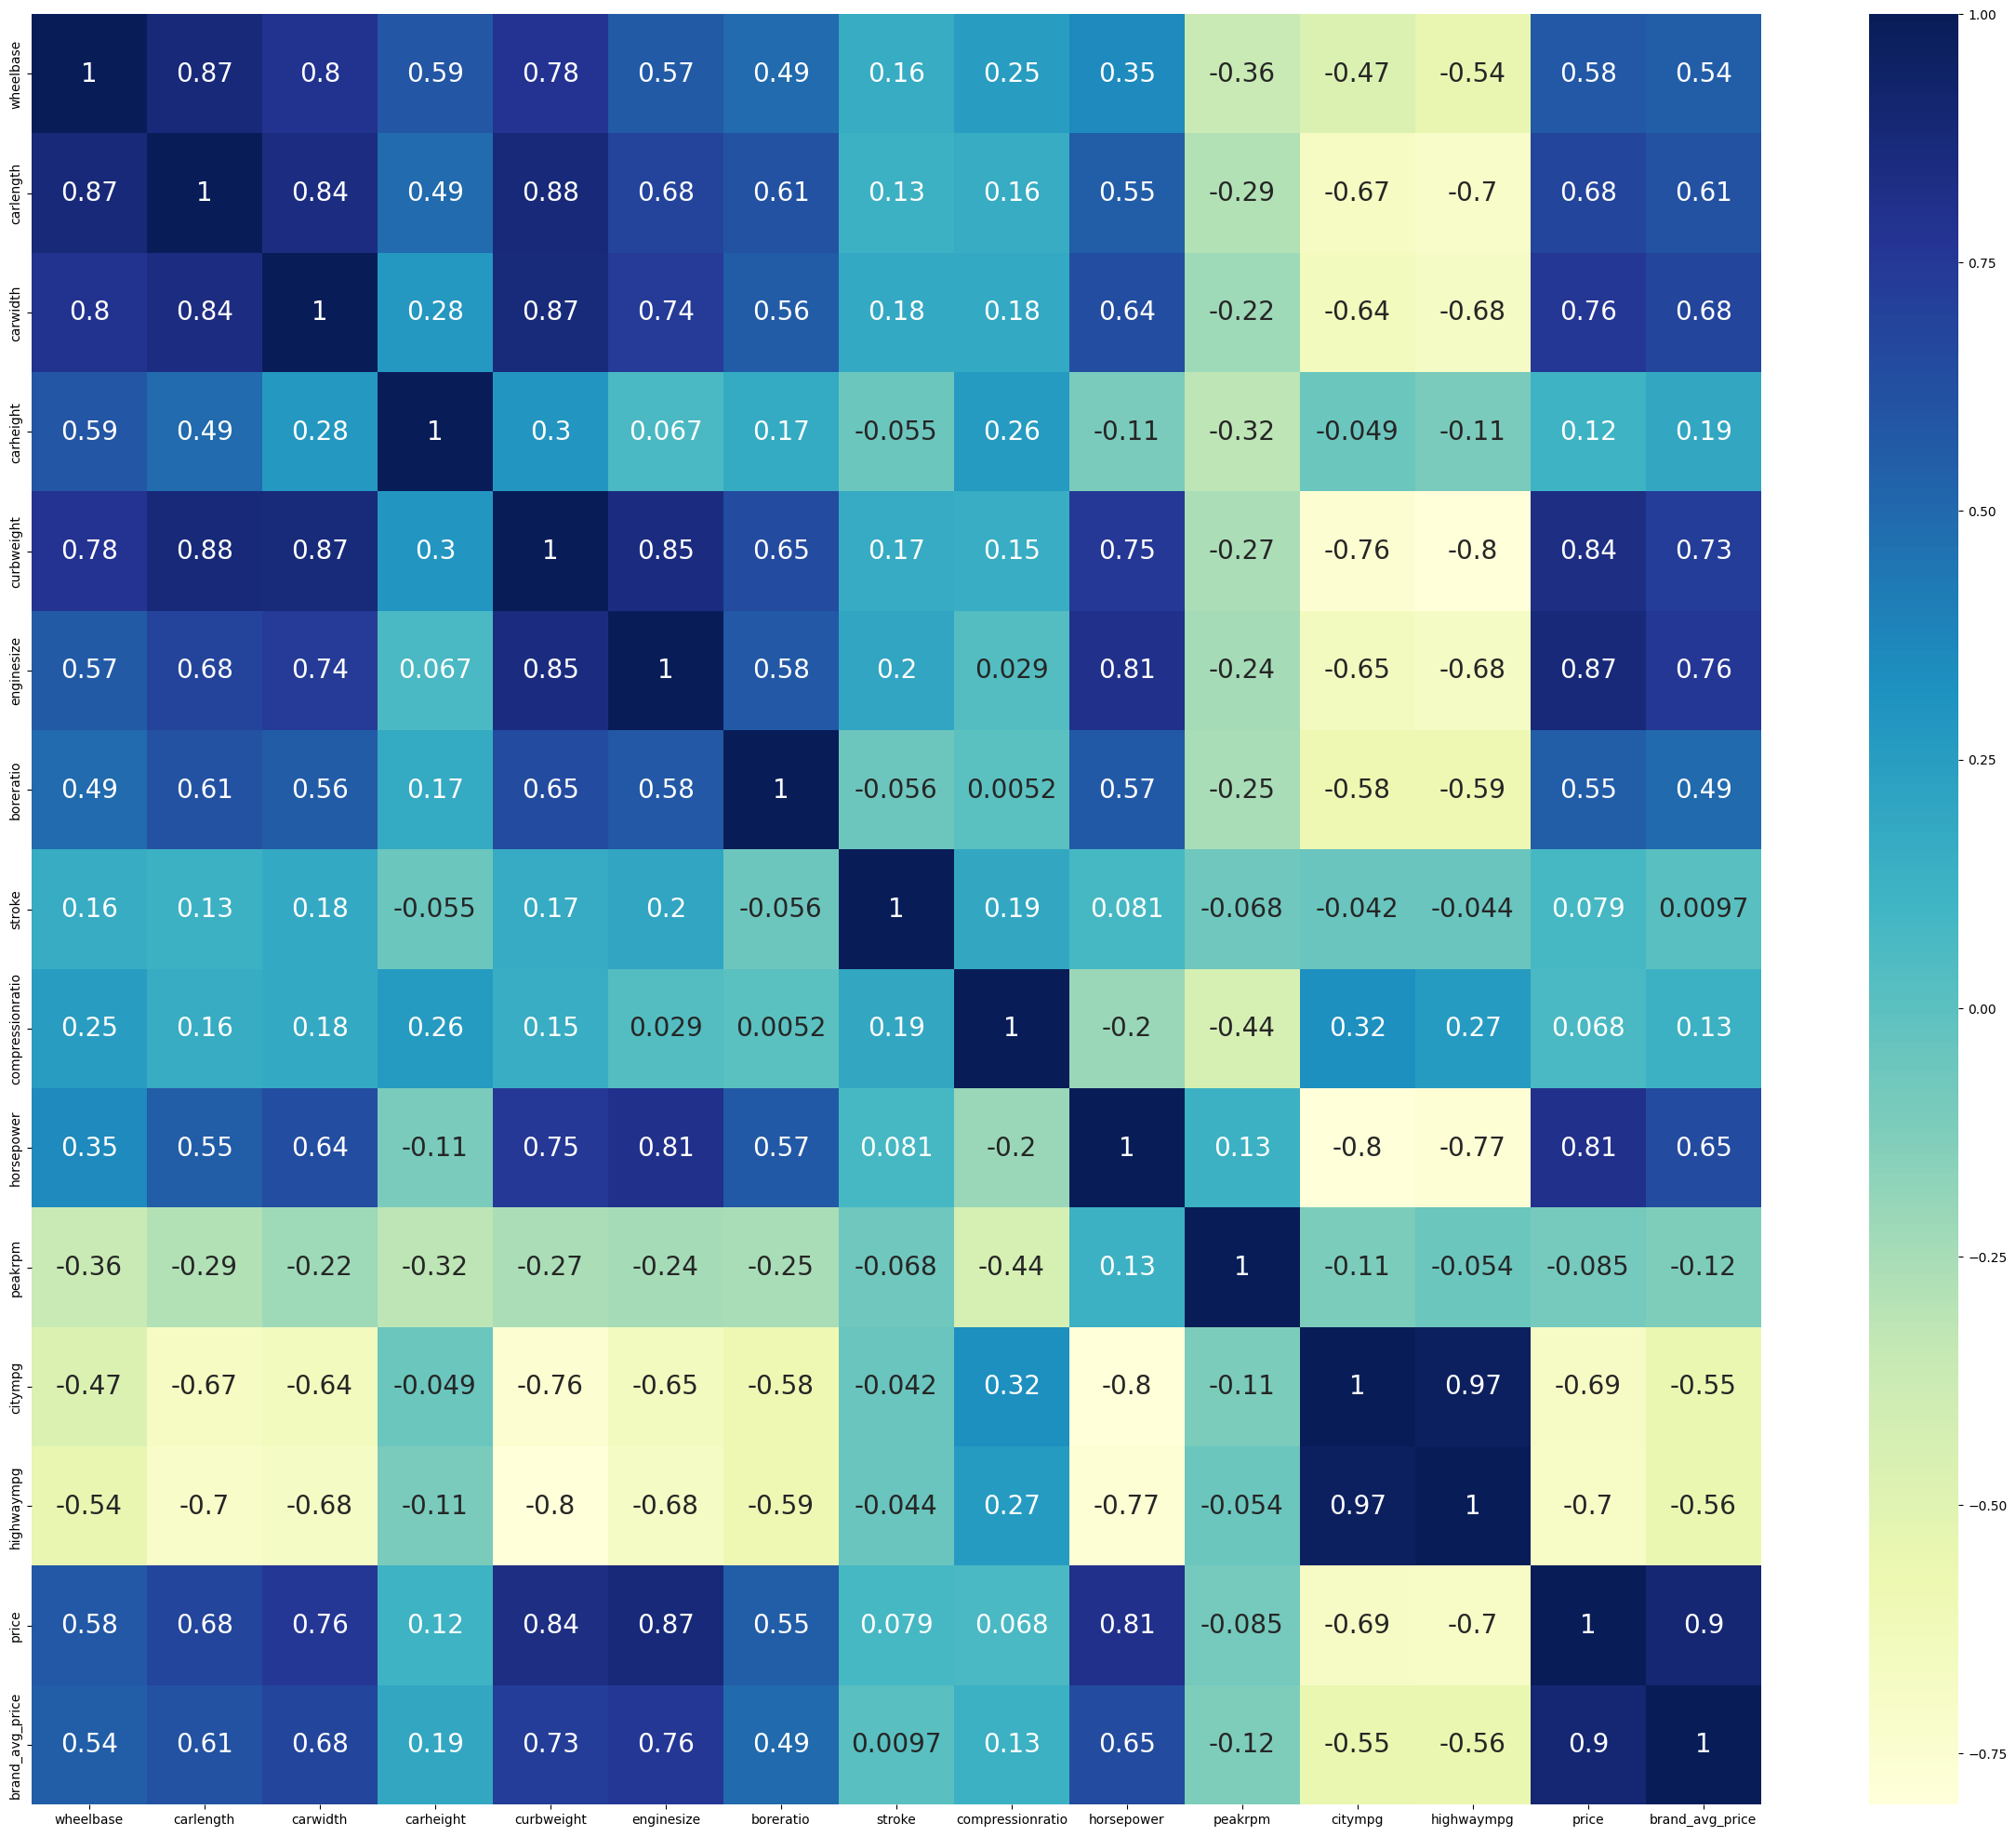

In [44]:
num = data.select_dtypes(include = ['int64', 'float64'])
plt.figure(figsize = (30, 25))       #annot_kws={"size": 20} no es necesario, pero para ver mejor
sns.heatmap(num.corr(), annot = True, cmap="YlGnBu", annot_kws={"size": 20}) 
plt.show()   

Escogemos estas siguientes Numerical, esta es una forma sencilla de elegir variables, se que hay mejores metodos:

- enginesize                   
- horsepower          
- carwidth                   
- highwaympg
- wheelbase   

In [55]:
columns=['aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand_category', 'enginesize','horsepower', 'carwidth','highwaympg', 'wheelbase', 'price']

In [56]:
selected = data[columns]
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      205 non-null    object 
 1   carbody         205 non-null    object 
 2   drivewheel      205 non-null    object 
 3   enginetype      205 non-null    object 
 4   cylindernumber  205 non-null    object 
 5   fuelsystem      205 non-null    object 
 6   brand_category  205 non-null    object 
 7   enginesize      205 non-null    int64  
 8   horsepower      205 non-null    int64  
 9   carwidth        205 non-null    float64
 10  highwaympg      205 non-null    int64  
 11  wheelbase       205 non-null    float64
 12  price           205 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 20.9+ KB


In [58]:
selected.head()

,aspiration,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,brand_category,enginesize,horsepower,carwidth,highwaympg,wheelbase,price
0,std,convertible,rwd,dohc,four,mpfi,Mid_Range,130,111,64.1,27,88.6,13495.0
1,std,convertible,rwd,dohc,four,mpfi,Mid_Range,130,111,64.1,27,88.6,16500.0
2,std,hatchback,rwd,ohcv,six,mpfi,Mid_Range,152,154,65.5,26,94.5,16500.0
3,std,sedan,fwd,ohc,four,mpfi,Mid_Range,109,102,66.2,30,99.8,13950.0
4,std,sedan,4wd,ohc,five,mpfi,Mid_Range,136,115,66.4,22,99.4,17450.0


In [60]:
X = selected.drop("price", axis=1)
y = selected["price"]

In [61]:
categorical_columns = X.select_dtypes(include=['object']).columns.to_list()
categorical_columns

['aspiration',
 'carbody',
 'drivewheel',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'brand_category']

In [63]:
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns.to_list()
numeric_columns

['enginesize', 'horsepower', 'carwidth', 'highwaympg', 'wheelbase']

In [70]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=0)

In [66]:
X_train[categorical_columns].head()

,aspiration,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,brand_category
40,std,sedan,fwd,ohc,four,1bbl,Budget
60,std,sedan,fwd,ohc,four,2bbl,Mid_Range
56,std,hatchback,rwd,rotor,two,4bbl,Mid_Range
101,std,sedan,fwd,ohcv,six,mpfi,Mid_Range
86,std,sedan,fwd,ohc,four,2bbl,Budget


In [72]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_columns),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
])

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', LinearRegression())
])


In [73]:
pipe.fit(X_train, y_train)


,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [74]:
y_pred = pipe.predict(X_test)

In [76]:
from sklearn.metrics import mean_absolute_error


In [78]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2:.2f}')


MAE: 2182.73
MSE: 10519683.88
RMSE: 3243.41
R2: 0.84


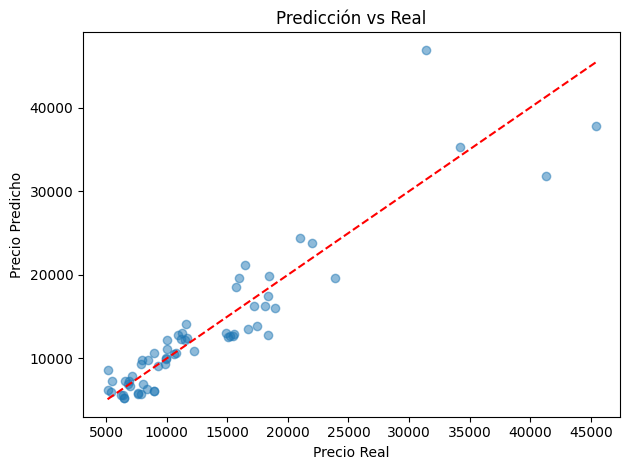

In [79]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Predicción vs Real')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()


In [80]:
import joblib

In [81]:
def save_ml_model(ml_object, name):
    joblib.dump(ml_object, f"../models/{name}.joblib")
    print("Model guaradado exitosamente")
save_ml_model(pipe, "modelo_regresion_lineal")

Model guaradado exitosamente
